In [1]:
import signal_processing, data_load, learn, evaluate

Using TensorFlow backend.


In [2]:
num_rows = 45
num_columns = 2900
num_channels = 1

num_epochs = 10
num_batch_size = 11
num_speakers = 2

In [3]:
featuresdf = data_load.make_dataframe(num_speakers, './Dataset/wav/', num_rows, num_columns)

Finished feature extraction from  208  files


In [4]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

In [5]:
learn.compile(model) 

In [6]:
result_sets[1].shape

(42, 45, 2900, 1)

In [7]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 2899, 16)      80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 1449, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 1449, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 1448, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 724, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 724, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 723, 64)        8

In [8]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'CNN3', 'default', 'CNN3')

Train on 166 samples, validate on 42 samples
Epoch 1/10
165/166 [============================>.] - ETA: 0s - loss: 0.7769 - accuracy: 0.5576
Epoch 00001: val_loss improved from inf to 0.68569, saving model to saved_models/weights.best.CNN3.hdf5
166/166 [==============================] - 27s 162ms/sample - loss: 0.7796 - accuracy: 0.5542 - val_loss: 0.6857 - val_accuracy: 0.3333
Epoch 2/10
165/166 [============================>.] - ETA: 0s - loss: 0.7156 - accuracy: 0.5515
Epoch 00002: val_loss improved from 0.68569 to 0.54356, saving model to saved_models/weights.best.CNN3.hdf5
166/166 [==============================] - 24s 144ms/sample - loss: 0.7121 - accuracy: 0.5542 - val_loss: 0.5436 - val_accuracy: 0.6905
Epoch 3/10
165/166 [============================>.] - ETA: 0s - loss: 0.5148 - accuracy: 0.7818
Epoch 00003: val_loss improved from 0.54356 to 0.47308, saving model to saved_models/weights.best.CNN3.hdf5
166/166 [==============================] - 23s 141ms/sample - loss: 0.5164 

In [9]:
import evaluate
evaluate.evaluate_model(model, 'CNN3', result_sets)

Training Accuracy:  0.9939759
Testing Accuracy:  1.0


In [10]:
evaluate.display_metrics(model, 'CNN3', result_sets)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        29

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

Confusion matrix: 
[[13  0]
 [ 0 29]]


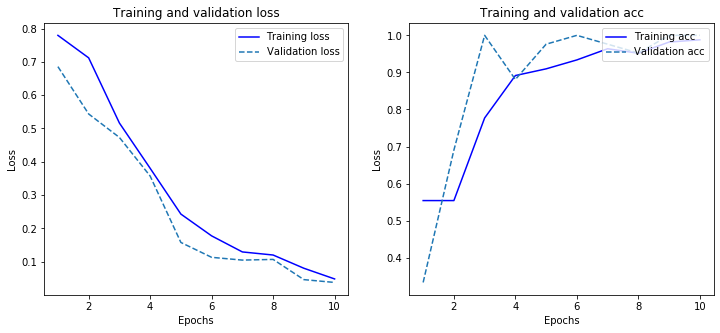

In [11]:
evaluate.plot_history(history)

In [12]:
modelReg = learn.build_regularized_CNN_model(num_rows, num_columns, num_labels)
learn.compile(modelReg)
reg_history= learn.train_model(modelReg, result_sets, num_epochs, num_batch_size, 'CNN3Reg', 'regularization', 'CNN3Reg')

Train on 166 samples, validate on 42 samples
Epoch 1/10
165/166 [============================>.] - ETA: 0s - loss: 2.1883 - accuracy: 0.4788
Epoch 00001: val_loss improved from inf to 1.79713, saving model to saved_models/weights.best.CNN3Reg.hdf5
166/166 [==============================] - 15s 88ms/sample - loss: 2.1849 - accuracy: 0.4819 - val_loss: 1.7971 - val_accuracy: 0.7619
Epoch 2/10
165/166 [============================>.] - ETA: 0s - loss: 1.7456 - accuracy: 0.5697
Epoch 00002: val_loss improved from 1.79713 to 1.62938, saving model to saved_models/weights.best.CNN3Reg.hdf5
166/166 [==============================] - 13s 81ms/sample - loss: 1.7444 - accuracy: 0.5723 - val_loss: 1.6294 - val_accuracy: 0.8333
Epoch 3/10
165/166 [============================>.] - ETA: 0s - loss: 1.5750 - accuracy: 0.7636
Epoch 00003: val_loss improved from 1.62938 to 1.45950, saving model to saved_models/weights.best.CNN3Reg.hdf5
166/166 [==============================] - 14s 82ms/sample - loss: 1

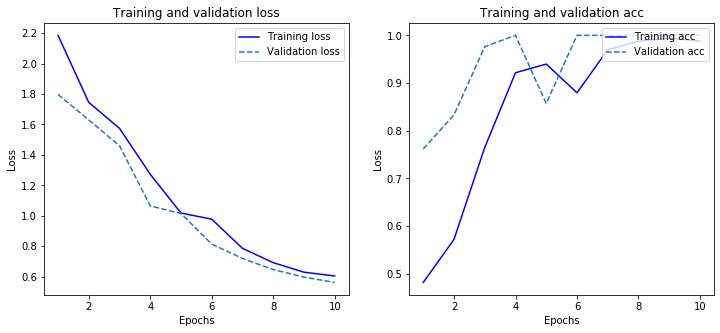

In [13]:
evaluate.plot_history(reg_history)

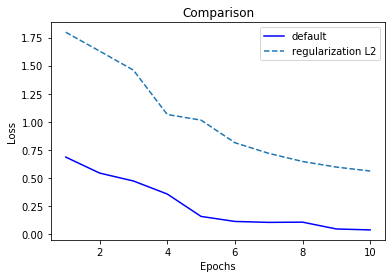

In [14]:
evaluate.plot_compared_val_loss(history, reg_history, 'default', 'regularization L2')